In [1]:
import numpy as np
import pandas as pd
import re
from scipy import stats

# Import CSV file
file_path = "/Users/lobster/Desktop/Movie Replication Set.csv"
df = pd.read_csv(file_path)

# Function to extract year from movie title
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        return int(match.group(1))
    return None

# Create a DataFrame to hold the movie titles and their associated decades
movie_decades_df = pd.DataFrame({'Movie': df.columns[:400]})
movie_decades_df['Year'] = movie_decades_df['Movie'].apply(extract_year)
movie_decades_df['Decade'] = (movie_decades_df['Year'] // 10) * 10

# Drop movies for which we couldn't extract a release year
movie_decades_df.dropna(inplace=True)

# Calculate the average rating for each movie
movie_avg_ratings = df[df.columns[:400]].mean()

# Combine the average ratings with the decades DataFrame
movie_decades_df.set_index('Movie', inplace=True)
movie_decades_df['AvgRating'] = movie_avg_ratings
movie_decades_df.dropna(inplace=True)  # Remove rows with missing AvgRating

# Calculate the average rating for each decade
decade_avg_ratings = movie_decades_df.groupby('Decade')['AvgRating'].mean()

# Prepare data for ANOVA test
anova_data = [movie_decades_df[movie_decades_df['Decade'] == decade]['AvgRating'] for decade in decade_avg_ratings.index]

# Perform ANOVA test
f_value, p_value = stats.f_oneway(*anova_data)

# Display results
print(f"Decade-wise average ratings: \n{decade_avg_ratings}")
print(f"F-value: {f_value}")
print(f"P-value: {p_value}")

# Interpretation based on pre-set significance level alpha = 0.005
if p_value < 0.005:
    print("Reject the null hypothesis. There is a statistically significant difference in the average ratings of movies across decades.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the average ratings of movies across decades.")


Decade-wise average ratings: 
Decade
1960    2.502345
1970    2.546819
1980    2.606803
1990    2.655633
2000    2.629871
2010    2.793541
Name: AvgRating, dtype: float64
F-value: 2.2569795094108387
P-value: 0.048139506430825804
Fail to reject the null hypothesis. There is no statistically significant difference in the average ratings of movies across decades.


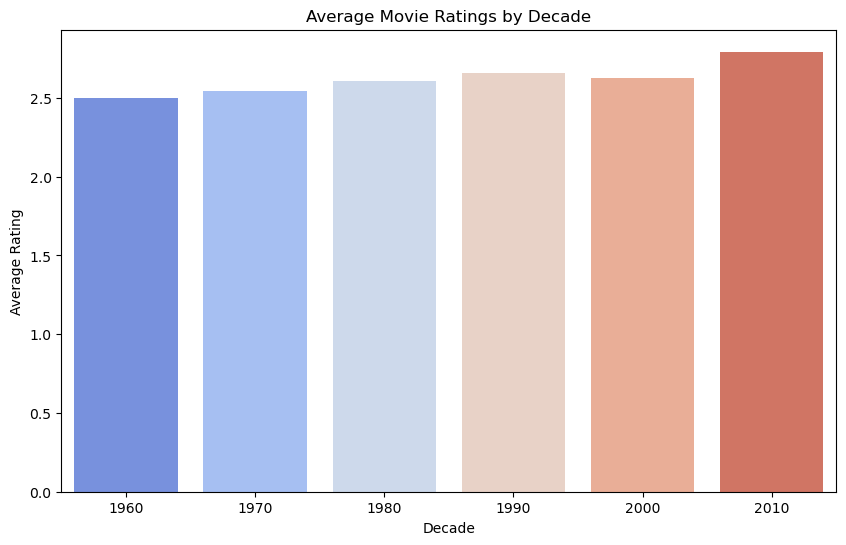

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the decade_avg_ratings to a DataFrame for better compatibility with Seaborn
decade_avg_ratings_df = decade_avg_ratings.reset_index()
decade_avg_ratings_df.columns = ['Decade', 'Average Rating']

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Decade', y='Average Rating', data=decade_avg_ratings_df, palette='coolwarm')

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.title('Average Movie Ratings by Decade')

# Show the plot
plt.show()
